In [2]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
stock = yf.download("spy")

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

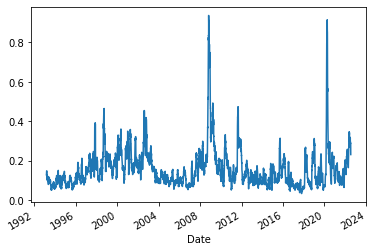

In [3]:
def CCHV(stock_data,look_back_window = 22):
    """
    Pros:
        Well understood sampling properties
        Easy to correct bias
        Easy to convert to "typically daily moves"
    Cons:
        Inefficient
        
    Inputs:
        stock_data -> DataFrame: OHLC stock data frame
        look_back_dindow -> Int: Look back days for the rolling mean
    Outpus:
        vol -> pd.Series: Close to Close Volatility Estimator
    """
    vol = cchv = np.sqrt(252) * pd.DataFrame.rolling(np.log(stock_data.loc[:, 'Adj Close'] / stock_data.loc[:, 'Adj Close'].shift(1)),
                                            window=look_back_window).std()
    return vol
vol = CCHV(stock,look_back_window = 22)
vol.plot()

    

<AxesSubplot:xlabel='Date'>

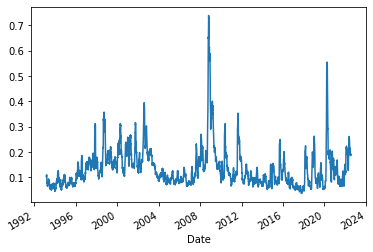

In [25]:
def  ParkinsonHV(stock_data,look_back_window = 22):
    """
    Pros:

    Cons:
        Cant Handle Trends & Jumps
        Under Estimates Volatility
        
    Inputs:
        stock_data -> DataFrame: OHLC stock data frame
        look_back_dindow -> Int: Look back days for the rolling mean
    Outpus:
        vol -> pd.Series: Close to Close Volatility Estimator
    """
    vol = np.sqrt(252 / (4 * look_back_window * np.log(2)) *
                pd.DataFrame.rolling(np.log(stock_data.loc[:, 'High'] / stock_data.loc[:, 'Low']) ** 2, window=look_back_window).sum())

    return vol
vol = ParkinsonHV(stock,look_back_window = 22)
vol.plot()


<AxesSubplot:xlabel='Date'>

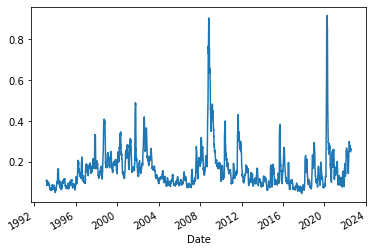

In [5]:
def  GK_Yang_Zhang_HV(stock_data,look_back_window = 22):
    """
    Pros:
        Can handle over night Jumps
        Efficient Use of data
    Cons:
        Cant Handle Trends
        Overestimate the Volatility
        
    Inputs:
        stock_data -> DataFrame: OHLC stock data frame
        look_back_dindow -> Int: Look back days for the rolling mean
    Outpus:
        vol -> pd.Series: Close to Close Volatility Estimator
    """
    vol = np.sqrt(252 / 22 * pd.DataFrame.rolling(np.log(stock_data.loc[:, 'Open'] / stock_data.loc[:, 'Close'].shift(1)) ** 2 +
        0.5 * np.log(stock_data.loc[:, 'High'] / stock_data.loc[:, 'Low']) ** 2 -
        (2 * np.log(2) - 1) *
        np.log(stock_data.loc[:, 'Close'] / stock_data.loc[:, 'Open']) ** 2,
        window=look_back_window).sum())
    return vol

vol = GK_Yang_Zhang_HV(stock,look_back_window = 22)
vol.plot()

#Garman-Klass Estimator

#Rogers-Satchell Estimator

# Yang-Zhang Estimator

#First Exit Time Estimator


<AxesSubplot:xlabel='Date'>

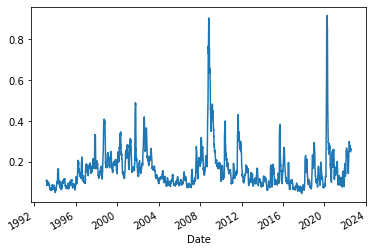

In [6]:
def  GermanHV(stock_data,look_back_window = 22):
    """
    Pros:
        Can handle over night Jumps
        Efficient Use of data
    Cons:
        Biased
        
    Inputs:
        stock_data -> DataFrame: OHLC stock data frame
        look_back_dindow -> Int: Look back days for the rolling mean
    Outpus:
        vol -> pd.Series: Close to Close Volatility Estimator
    """
    vol = np.sqrt(252 / 22 * pd.DataFrame.rolling(np.log(stock_data.loc[:, 'Open'] / stock_data.loc[:, 'Close'].shift(1)) ** 2 +
        0.5 * np.log(stock_data.loc[:, 'High'] / stock_data.loc[:, 'Low']) ** 2 -
        (2 * np.log(2) - 1) *
        np.log(stock_data.loc[:, 'Close'] / stock_data.loc[:, 'Open']) ** 2,
        window=look_back_window).sum())
    return vol

vol = GermanHV(stock,look_back_window = 22)
vol.plot()

<AxesSubplot:xlabel='Date'>

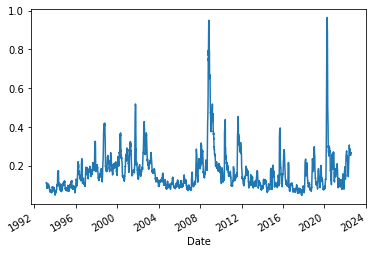

In [29]:
def ZhangHV(stock_data, look_back_window = 22):
    """
    Pros:
        Minimum Estimation Error
        Can handle dift and jumps
        Efficient
    Cons:
        Degrades on jumps
        
    Inputs:
        stock_data -> DataFrame: OHLC stock data frame
        look_back_dindow -> Int: Look back days for the rolling mean
    Outpus:
        vol -> pd.Series: Close to Close Volatility Estimator
    """
    
    k = 0.34/(1.34+(look_back_window+1/look_back_window-1))
    over_night_vol = (1/(look_back_window-1))*pd.DataFrame.rolling(np.log(stock_data['Open']/stock_data['Close'].shift(1))**2, window = look_back_window).sum()
    open_to_close_vol = (1/(look_back_window-1)) * pd.DataFrame.rolling(np.log(stock_data['Close']/stock_data['Open'])**2,window = look_back_window).sum()
    
    #RS components
    high_open = np.log(stock_data['High']/stock_data['Open'])
    low_open = np.log(stock_data['Low']/stock_data['Open'])
    close_open = np.log(stock_data['Close']/stock_data['Open'])
    rs = (1/(look_back_window -1))* pd.DataFrame.rolling(high_open * (high_open - close_open) + low_open * (low_open - close_open),window = look_back_window).sum()
    
    #combined measures with weighted components
    vol = np.sqrt(over_night_vol + k*open_to_close_vol + (1-k)*rs)*np.sqrt(252)
    
    return vol 

ZhangHV(stock,look_back_window = 22).plot()


In [53]:
# plt.hist(stock['Adj Close'].pct_change()*100, bins = 1000)
# plt.hist(np.random.normal(0.04,1.18,len(stock)), bins = 1000)